# 携帯電話の機能データからの価格帯分類
～「携帯電話の機能から販売価格を分類しよう！」

In [71]:
import pandas as pd
import numpy as np
import keras

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample_submission.csv",header=None)
print("Data Shapes")
print("Train:",train.shape, "Test:",test.shape, "Sample:",sample.shape)

Data Shapes
Train: (1600, 22) Test: (400, 21) Sample: (400, 2)


### データセットの調査

In [72]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [73]:
train.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1170,1,0.431590,0,0,1,2,0.768279,200,...,33,1911,3383,16,5,2,1,0,1,1
1,1,1165,0,0.469539,0,0,1,14,0.344413,114,...,176,677,2036,12,5,13,1,0,1,1
2,2,654,0,0.474741,1,0,0,21,0.339489,145,...,270,1805,2676,15,7,20,1,0,1,3
3,3,562,0,0.492385,1,1,0,32,0.082197,180,...,174,1031,1589,11,3,3,1,1,1,0
4,4,1152,1,2.404824,1,0,0,12,0.798405,183,...,640,1927,3440,16,0,11,1,1,1,1


### 目的変数の抽出

In [74]:
y = train["price_range"].values
print(y)
print()
#ONE-HOTに変換
y = keras.utils.to_categorical(y)
print(y)

[1 1 3 ... 1 1 1]

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


### 不要カラムの削除

In [75]:
train = train.drop(columns=["price_range","id"])
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1170,1,0.431590,0,0,1,2,0.768279,200,5,20,33,1911,3383,16,5,2,1,0,1
1,1165,0,0.469539,0,0,1,14,0.344413,114,3,9,176,677,2036,12,5,13,1,0,1
2,654,0,0.474741,1,0,0,21,0.339489,145,1,3,270,1805,2676,15,7,20,1,0,1
3,562,0,0.492385,1,1,0,32,0.082197,180,5,3,174,1031,1589,11,3,3,1,1,1
4,1152,1,2.404824,1,0,0,12,0.798405,183,1,7,640,1927,3440,16,0,11,1,1,1


In [76]:
test = test.drop(columns=["id"])
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1148,0,2.394297,0,0,1,54,0.356241,174,7,4,152,971,2638,7,4,6,1,0,0
1,1026,0,0.439427,0,0,1,32,0.801147,202,2,3,184,1015,1986,17,7,20,1,1,0
2,518,0,0.418797,1,0,1,20,0.026330,89,1,4,183,1975,381,7,4,7,1,0,0
3,1163,1,0.426839,0,0,1,49,0.846984,147,2,9,612,1013,1994,9,5,15,1,0,0
4,1026,1,1.170707,0,0,1,60,0.026682,177,5,4,976,1161,1985,14,7,13,1,0,0


In [77]:
train_data = train.values
train_labels = y
test_data = test.values


### 正規化

In [78]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std


### モデルの構築

In [79]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

#model.compile(optimizer='adam', 
#              loss='mse', 
#              metrics=['mae'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['mae'])

### 学習

In [80]:
from tensorflow import keras

# 完了したエポックごとに1つのドットを印刷して、トレーニングの進捗状況を表示する
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# 学習データ(train_data)のうち、20％が検証データ（validation）として使用される    
history = model.fit(train_data, 
                    train_labels,
                    batch_size=64,
                    epochs=200,
                    validation_split=0.2,
                    callbacks=[PrintDot()]) 

Train on 1280 samples, validate on 320 samples
Epoch 1/200
1280/1280 [==============================] - 0s 145us/step - loss: 1.3384 - mae: 0.3675 - val_loss: 1.2737 - val_mae: 0.3569

.Epoch 2/200
1280/1280 [==============================] - 0s 99us/step - loss: 1.2445 - mae: 0.3502 - val_loss: 1.2015 - val_mae: 0.3404
.Epoch 3/200
1280/1280 [==============================] - 0s 52us/step - loss: 1.1857 - mae: 0.3358 - val_loss: 1.1520 - val_mae: 0.3261
.Epoch 4/200
1280/1280 [==============================] - 0s 23us/step - loss: 1.1449 - mae: 0.3235 - val_loss: 1.1170 - val_mae: 0.3144
.Epoch 5/200
1280/1280 [==============================] - 0s 24us/step - loss: 1.1159 - mae: 0.3137 - val_loss: 1.0920 - val_mae: 0.3054
.Epoch 6/200
1280/1280 [==============================] - 0s 25us/step - loss: 1.0948 - mae: 0.3064 - val_loss: 1.0739 - val_mae: 0.2987
.Epoch 7/200
1280/1280 [==============================] - 0s 24us/step - loss: 1.0790 - mae: 0.3011 - val_loss: 1.0603 - val_mae: 

1280/1280 [==============================] - 0s 27us/step - loss: 0.8661 - mae: 0.2490 - val_loss: 0.9911 - val_mae: 0.2628
.Epoch 61/200
1280/1280 [==============================] - 0s 25us/step - loss: 0.8637 - mae: 0.2484 - val_loss: 0.9913 - val_mae: 0.2625
.Epoch 62/200
1280/1280 [==============================] - 0s 26us/step - loss: 0.8611 - mae: 0.2478 - val_loss: 0.9923 - val_mae: 0.2625
.Epoch 63/200
1280/1280 [==============================] - 0s 26us/step - loss: 0.8588 - mae: 0.2475 - val_loss: 0.9928 - val_mae: 0.2619
.Epoch 64/200
1280/1280 [==============================] - 0s 26us/step - loss: 0.8564 - mae: 0.2465 - val_loss: 0.9930 - val_mae: 0.2620
.Epoch 65/200
1280/1280 [==============================] - 0s 26us/step - loss: 0.8532 - mae: 0.2462 - val_loss: 0.9934 - val_mae: 0.2613
.Epoch 66/200
1280/1280 [==============================] - 0s 26us/step - loss: 0.8509 - mae: 0.2452 - val_loss: 0.9941 - val_mae: 0.2617
.Epoch 67/200
1280/1280 [=======================

1280/1280 [==============================] - 0s 26us/step - loss: 0.7028 - mae: 0.2135 - val_loss: 1.0248 - val_mae: 0.2580
.Epoch 120/200
1280/1280 [==============================] - 0s 27us/step - loss: 0.6999 - mae: 0.2127 - val_loss: 1.0262 - val_mae: 0.2584
.Epoch 121/200
1280/1280 [==============================] - 0s 26us/step - loss: 0.6975 - mae: 0.2122 - val_loss: 1.0275 - val_mae: 0.2585
.Epoch 122/200
1280/1280 [==============================] - 0s 26us/step - loss: 0.6937 - mae: 0.2113 - val_loss: 1.0285 - val_mae: 0.2586
.Epoch 123/200
1280/1280 [==============================] - 0s 26us/step - loss: 0.6910 - mae: 0.2110 - val_loss: 1.0288 - val_mae: 0.2578
.Epoch 124/200
1280/1280 [==============================] - 0s 26us/step - loss: 0.6872 - mae: 0.2098 - val_loss: 1.0304 - val_mae: 0.2581
.Epoch 125/200
1280/1280 [==============================] - 0s 26us/step - loss: 0.6837 - mae: 0.2090 - val_loss: 1.0317 - val_mae: 0.2586
.Epoch 126/200
1280/1280 [================

1280/1280 [==============================] - 0s 28us/step - loss: 0.4888 - mae: 0.1628 - val_loss: 1.1186 - val_mae: 0.2565
.Epoch 179/200
1280/1280 [==============================] - 0s 29us/step - loss: 0.4845 - mae: 0.1619 - val_loss: 1.1187 - val_mae: 0.2554
.Epoch 180/200
1280/1280 [==============================] - 0s 28us/step - loss: 0.4812 - mae: 0.1611 - val_loss: 1.1274 - val_mae: 0.2569
.Epoch 181/200
1280/1280 [==============================] - 0s 28us/step - loss: 0.4774 - mae: 0.1600 - val_loss: 1.1276 - val_mae: 0.2565
.Epoch 182/200
1280/1280 [==============================] - 0s 26us/step - loss: 0.4721 - mae: 0.1586 - val_loss: 1.1348 - val_mae: 0.2571
.Epoch 183/200
1280/1280 [==============================] - 0s 29us/step - loss: 0.4688 - mae: 0.1580 - val_loss: 1.1323 - val_mae: 0.2556
.Epoch 184/200
1280/1280 [==============================] - 0s 27us/step - loss: 0.4655 - mae: 0.1567 - val_loss: 1.1339 - val_mae: 0.2563
.Epoch 185/200
1280/1280 [================

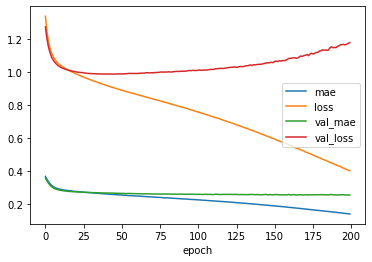

In [81]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history["mae"], label="mae")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_mae"], label="val_mae")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()

In [65]:
score = model.evaluate(train_data, train_labels, verbose=2)
print(score)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

[0.8807137954235077, 0.2494160532951355]

Test loss: 0.8807137954235077
Test accuracy: 0.2494160532951355


### 予測

In [66]:
test_predictions = model.predict(test_data)

In [67]:
print(test_predictions.shape)

(400, 4)


In [68]:
#最大値のインデックス
k = np.argmax(test_predictions,axis=1)
print(k)

[2 1 2 1 1 0 1 2 1 1 2 0 1 3 2 1 1 1 2 2 2 2 2 3 1 1 1 2 1 1 0 1 2 2 2 1 2
 2 2 1 1 1 1 2 2 2 3 1 3 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 1 2 2 2 1 3 1 3 3 2
 2 2 1 2 2 2 3 2 2 1 0 1 1 1 2 1 2 1 1 1 2 1 1 1 1 3 1 1 1 3 1 2 1 0 1 3 2
 1 2 2 2 2 3 2 1 1 2 3 1 0 2 1 1 1 1 2 2 2 1 2 2 3 1 1 1 1 2 2 3 1 1 2 2 0
 3 2 3 3 2 2 1 1 2 1 2 3 1 1 2 0 1 2 2 1 3 1 0 3 1 0 1 3 1 2 2 1 2 1 3 2 0
 1 2 2 2 2 1 0 1 2 3 2 1 1 1 1 2 1 2 1 3 2 2 3 1 1 2 1 1 2 1 2 0 3 2 2 1 1
 1 1 1 1 2 2 2 2 1 3 2 2 0 1 2 1 1 0 1 2 1 0 1 1 0 1 1 1 2 2 1 2 2 2 1 3 1
 1 1 1 2 2 2 1 1 2 2 1 3 2 1 3 1 2 3 2 1 3 3 1 0 1 2 3 1 1 1 3 1 1 3 3 2 2
 2 1 2 2 1 1 0 3 2 3 1 2 1 2 2 1 0 1 2 1 2 1 1 2 1 2 3 3 1 1 0 3 1 1 2 3 2
 1 2 1 2 2 1 1 2 1 2 3 2 3 2 1 2 1 3 0 0 1 3 1 2 3 0 1 3 2 2 2 3 1 1 2 3 1
 1 3 2 0 1 0 1 0 2 2 1 1 0 1 3 1 3 1 1 0 1 2 1 3 1 2 1 3 2 1]


In [69]:
sample[1] = k
sample

,0,1
0,1600,2
1,1601,1
2,1602,2
3,1603,1
4,1604,1
...,...,...
395,1995,2
396,1996,1
397,1997,3
398,1998,2


### ファイル出力

In [70]:
import csv
f = open('out.csv','w',newline='')
writer = csv.writer(f)
writer.writerows(sample.values)
f.close()

In [72]:
model.save('beginner_model')